In [1]:
!nvidia-smi

Wed Sep 13 16:04:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.24       Driver Version: 528.24       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  Off |
| 30%   42C    P2   153W / 450W |  14012MiB / 24564MiB |     59%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: c:\Users\mhajj\Documents\RUTILEA\mhajjaj


In [3]:
%cd {HOME}
# !git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!git checkout -q 57535c5a79791cb76e36fdb64975271354f10251
!pip install -q -e .

c:\Users\mhajj\Documents\RUTILEA\mhajjaj
c:\Users\mhajj\Documents\RUTILEA\mhajjaj\GroundingDINO


error: The following untracked working tree files would be overwritten by checkout:
	groundingdino/version.py
Please move or remove them before you switch branches.
Aborting


In [9]:
%cd {HOME}

# import sys
# !{sys.executable} -m pip install 'https://github.com/facebookresearch/segment-anything.git#egg=segment-anything'

c:\Users\mhajj\Documents\RUTILEA\mhajjaj


ERROR: Invalid requirement: "'https://github.com/facebookresearch/segment-anything.git#egg=segment-anything'"
Hint: = is not a valid operator. Did you mean == ?


In [10]:
!pip install git+https://github.com/facebookresearch/segment-anything.git#egg=segment-anything

  Cloning https://github.com/facebookresearch/segment-anything.git to c:\users\mhajj\appdata\local\temp\pip-install-_lx_wxyk\segment-anything_9190890e1aab4a98b8c96e4cd6bcf498
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git 'C:\Users\mhajj\AppData\Local\Temp\pip-install-_lx_wxyk\segment-anything_9190890e1aab4a98b8c96e4cd6bcf498'


In [13]:
!pip uninstall -y supervision
!pip install -q supervision==0.6.0

import supervision as sv
print(sv.__version__)

Found existing installation: supervision 0.4.0
Uninstalling supervision-0.4.0:
  Successfully uninstalled supervision-0.4.0
0.6.0


In [14]:
import os

GROUNDING_DINO_CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(GROUNDING_DINO_CONFIG_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CONFIG_PATH))

c:\Users\mhajj\Documents\RUTILEA\mhajjaj\GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [24]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights
# !wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

c:\Users\mhajj\Documents\RUTILEA\mhajjaj
c:\Users\mhajj\Documents\RUTILEA\mhajjaj\weights


The syntax of the command is incorrect.


In [25]:
import os

GROUNDING_DINO_CHECKPOINT_PATH = os.path.join(HOME, "weights", "groundingdino_swint_ogc.pth")
print(GROUNDING_DINO_CHECKPOINT_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CHECKPOINT_PATH))

c:\Users\mhajj\Documents\RUTILEA\mhajjaj\weights\groundingdino_swint_ogc.pth ; exist: True


In [26]:
%cd {HOME}
!mkdir -p {HOME}/weights
%cd {HOME}/weights

# !wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

c:\Users\mhajj\Documents\RUTILEA\mhajjaj
c:\Users\mhajj\Documents\RUTILEA\mhajjaj\weights


The syntax of the command is incorrect.


In [27]:
import os

SAM_CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(SAM_CHECKPOINT_PATH, "; exist:", os.path.isfile(SAM_CHECKPOINT_PATH))

c:\Users\mhajj\Documents\RUTILEA\mhajjaj\weights\sam_vit_h_4b8939.pth ; exist: True


In [28]:
import torch

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [29]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import Model

grounding_dino_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH)

c:\Users\mhajj\Documents\RUTILEA\mhajjaj\GroundingDINO


c:\Users\mhajj\Documents\RUTILEA\rutilea_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\mhajj\Documents\RUTILEA\rutilea_env\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


In [30]:
SAM_ENCODER_VERSION = "vit_h"

In [31]:
from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry[SAM_ENCODER_VERSION](checkpoint=SAM_CHECKPOINT_PATH).to(device=DEVICE)
sam_predictor = SamPredictor(sam)

In [32]:
f"{HOME}/data"

'c:\\Users\\mhajj\\Documents\\RUTILEA\\mhajjaj/data'

In [33]:
%cd {HOME}
!mkdir {HOME}/data
%cd {HOME}/data

c:\Users\mhajj\Documents\RUTILEA\mhajjaj
c:\Users\mhajj\Documents\RUTILEA\mhajjaj\data


The syntax of the command is incorrect.


In [39]:
SOURCE_IMAGE_PATH = f"{HOME}/data/dog-3.jpeg"
CLASSES = ['car', 'dog', 'person', 'nose', 'chair', 'shoe', 'tree']
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

In [40]:
from typing import List

def enhance_class_name(class_names: List[str]) -> List[str]:
    return [
        f"all {class_name}s"
        for class_name
        in class_names
    ]

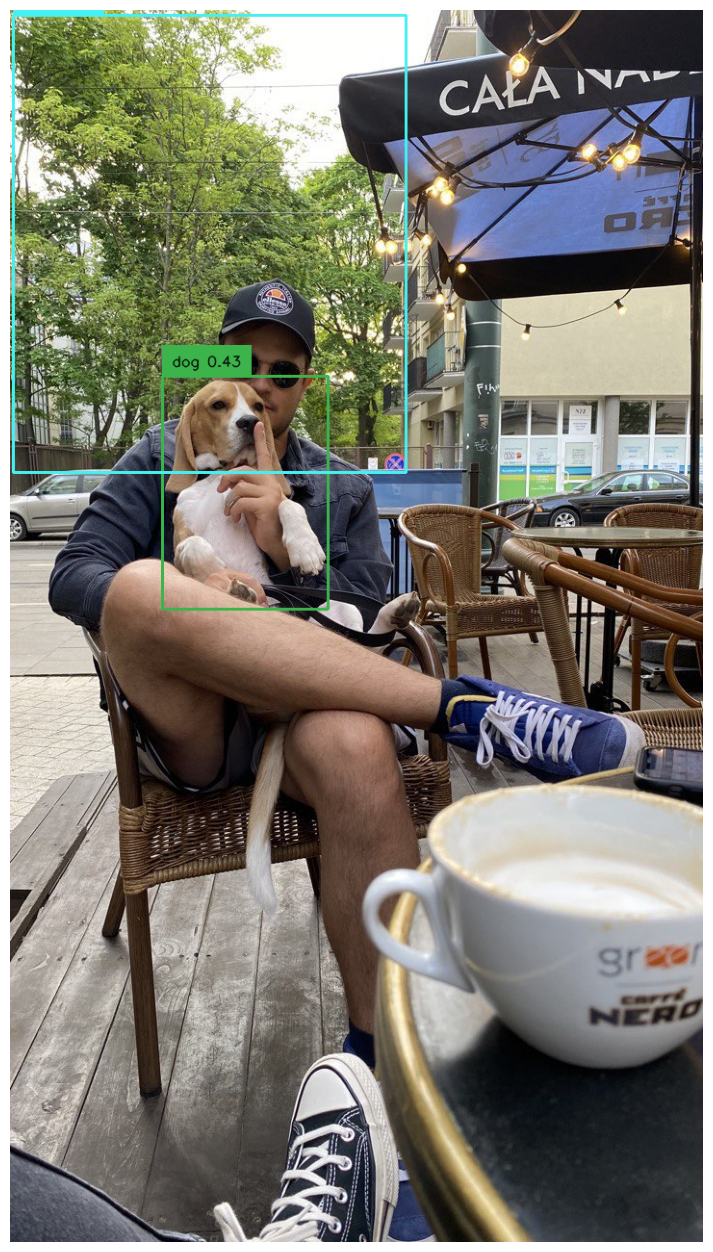

In [41]:
import cv2
import supervision as sv

# load image
image = cv2.imread(SOURCE_IMAGE_PATH)

# detect objects
detections = grounding_dino_model.predict_with_classes(
    image=image,
    classes=enhance_class_name(class_names=CLASSES),
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

# annotate image with detections
box_annotator = sv.BoxAnnotator()
labels = [
    f"{CLASSES[class_id]} {confidence:0.2f}" 
    for _, _, confidence, class_id, _ 
    in detections]
annotated_frame = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))